1. Рисование отрезков, окружности и эллипса

    a. Даны 2 точки на плоскости, нарисовать растровую матрицу и на ней построить отрезок между двумя точками
    
    b. Аналогично окружность и элипс - заданы центом и радиусами. 

In [3]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

### Используем алгоритм Брезенхема для построения отрезка

In [2]:
def generate_segment(start_x, start_y, end_x, end_y):
    x_len, y_len = abs(start_x - end_x), abs(start_y - end_y)
    steps = max([x_len, y_len]) 
    x_sigma = (end_x - start_x) / steps
    y_sigma = (end_y - start_y) / steps
    points = set()
    points.add((start_x, start_y))
    x, y = start_x, start_y
    k = 0
    while int(x) != end_x or int(y) != end_y:
        x += x_sigma 
        y += y_sigma 
        # print((int(x), int(y)))
        points.add((int(x), int(y)))
        k += 1
        if k > x_len + y_len:
            break
    return list(points)

def plot_segment(points):
    data = np.array(points)
    x, y = data.T
    plt.scatter(x,y)

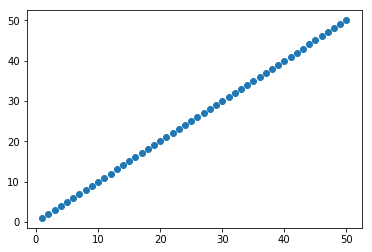

In [40]:
plot_segment(generate_segment(1, 1, 50, 50))

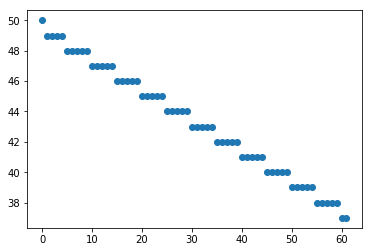

In [44]:
plot_segment(generate_segment(0, 50, 50, 40))

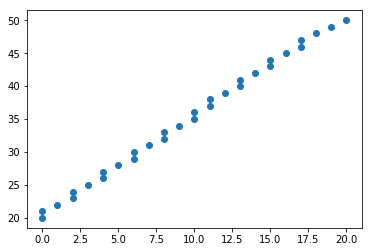

In [45]:
plot_segment(generate_segment(20, 50, 0, 20))

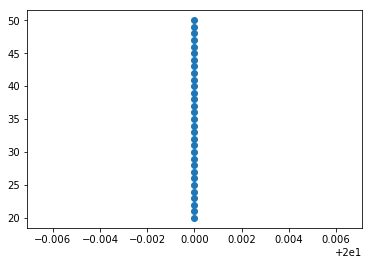

In [7]:
plot_segment(generate_segment(20, 50, 20, 20))

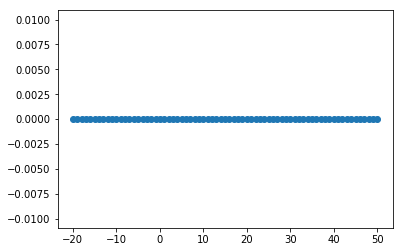

In [8]:
plot_segment(generate_segment(-20, 0, 50, 0))

### Алгоритм Брезенхема для построения окружности

In [16]:
def generate_circle(x0, y0, radius):
    x = 0
    y = radius
    delta = 1 - 2 * radius
    error = 0
    points = set()
    while y >= 0:
        points.add((x0 + x, y0 + y))
        points.add((x0 + x, y0 - y))
        points.add((x0 - x, y0 + y))
        points.add((x0 - x, y0 - y))
        error = 2 * (delta + y) - 1
        if delta < 0 and error <= 0:
            x += 1
            delta += 2 * x + 1
            continue
        error = 2 * (delta - x) - 1
        if delta > 0 and error > 0:
            y -= 1
            delta += 1 - 2 * y
            continue
        x += 1
        delta += 2 * (x - y)
        y -= 1
    return list(points)

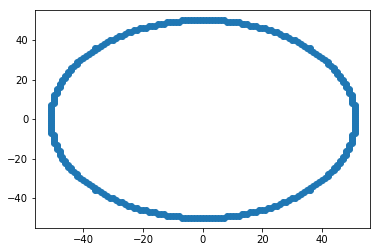

In [11]:
plot_segment(generate_circle(0, 0, 50))

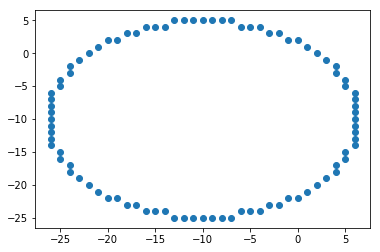

In [12]:
plot_segment(generate_circle(-10, -10, 15))

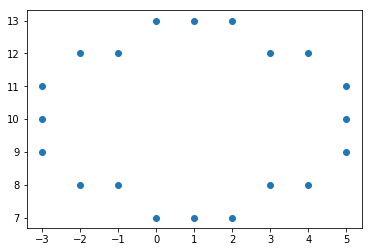

In [13]:
plot_segment(generate_circle(1, 10, 3))

### Алгоритм Брезенхема растровой дискретизации эллипса

In [26]:
def generate_ellipse(xc, yc, a, b):
    row = 0
    col = b
    a_sqr = a**2
    b_sqr = b**2
    d = (4 * b_sqr * ((row + 1) * (row + 1)) 
         + a_sqr * ((2 * col - 1) * (2 * col - 1)) - 4 * a_sqr * b_sqr)
    points = set()
    while a_sqr * (2 * col - 1) > 2 * b_sqr * (row + 1):
        points.add((xc + row, yc + col))
        points.add((xc + row, yc - col))
        points.add((xc - row, yc + col))
        points.add((xc - row, yc - col))
        if d < 0:
            row += 1
            d += 4 * b_sqr * (2 * row + 3)
        else:
            row += 1
            d = d - 8 * a_sqr * (col - 1) + 4 * b_sqr * (2 * row + 3)
            col -= 1
    delta = (b_sqr * ((2 * row + 1) * (2 * row + 1)) 
             + 4 * a_sqr * ((col + 1) * (col + 1)) 
             - 4 * a_sqr * b_sqr)
    while col + 1 != 0:
        points.add((xc + row, yc + col))
        points.add((xc + row, yc - col))
        points.add((xc - row, yc + col))
        points.add((xc - row, yc - col))
        if d < 0:
            col -= 1
            d += 4 * a_sqr * (2 * col + 3)
        else:
            col -= 1
            d = d - 8 * b_sqr * (row + 1) + 4 * a_sqr * (2 * col + 3)
            row += 1
    return list(points)

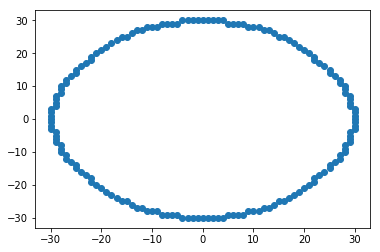

In [27]:
plot_segment(generate_ellipse(0, 0, 30, 30))

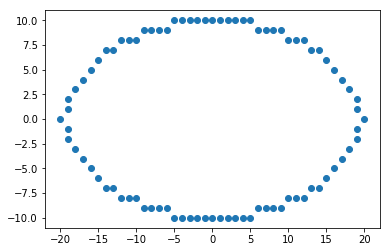

In [28]:
plot_segment(generate_ellipse(0, 0, 20, 10))